# Working with data 2017. Class 3
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Error debugging
2. Data visualization theory
    - Scatter
    - Histograms, violinplots and two histograms (jointplot)
    - Line plots with distributions (factorplot)
    - Paralell coordinates    
3. Dealing with missing data
4. In-class exercises to melt, pivot, concat and merge
5. Groupby and in-class exercises
7. Stats
    - What's a p-value?
    - One-tailed test vs two-tailed test
    - Count vs expected count (binomial test)
    - Independence between factors: ($\chi^2$ test)     

In [2]:

import pandas as pd
import numpy as np
import pylab as plt
from scipy.stats import chi2_contingency,ttest_ind

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline

from IPython.display import Image


# 6 Statistics I
To learn about statistics *well*, I recommend this course: https://www.coursera.org/specializations/social-science



## 6.0 Definitions
### 6.0.1 Population vs sample
- Population: The entire set of possible observations (all people in a country in a country-level survey)
- Sample: The observations we actually have

    
### 6.0.2 Parameter vs statistic
- Parameter: The true values that define the population ($\sigma$ and $\mu$ for a normal distribution)
- Statistic: The values that we calculate using our sample (STD and MEAN for a normal distribution)
    
    
### 6.0.3 Probability
- Probability: The proportion of times where the measured event occurs in the long run. For instance, the probability of 1/2 of in a coin toss means that if you toss a coin 1 million times you will more or less get 500k heads and 500k tails)


### 6.0.4 Null hypothesis:
- The hypothesis that our value is not significant.
- For instance our value can be the difference between two groups, or the difference between one group and zero.
- It is assumed to be true and we try to disprove it.
- It "is" disproved if the chances to dismiss it by chance are lower than 5%.


### 6.0.5 Alternative hypothesis:
- The hypothesis that our value is significant.
- Accepted after dismissing the null hypothesis.
    
    
### 6.0.6 Types of error:
- Type I ($\alpha$): Rejecting the null hypothesis when it was actually True (saying we have something we don't have). As a rule we set it to 0.05 and if the p-value is below it we accept the alternative hypothesis.
- Type II ($\beta$): Accepting the null hypothesis when it was actually False (saying we don't have something we actually have). This is a less important error.
    
    
### 6.0.7 p-value
- The p-value is defined as the probability of obtaining a result equal to or "more extreme" than what was actually observed, **when the null hypothesis is true.**
- "commonly misused and misinterpreted." --> a p-value of 0.01 does not mean that there is 1% chances that you are wrong!
- Low p-value can be for two reasons:
    - The null is true but your sample was unusual.
    - The null is false.
- with a p-value of 0.05 the probability of incorrectly rejecting a true null hypothesis is 23% (mainly for other bias).
    
    
### 6.0.8 Effect size:
- Difference between the difference of the two groups (of the one group with zero) divided by the standard deviation -> Cohen's d. 1 = the difference is equal to the std, not so great.
- Good summary: https://www.leeds.ac.uk/educol/documents/00002182.htm
- "For example, an AIDS vaccine study in Thailand obtained a P value of 0.039. Great! This was the first time that an AIDS vaccine had positive results. However, the confidence interval for effectiveness ranged from 1% to 52%. That’s not so impressive...the vaccine may work virtually none of the time up to half the time. The effectiveness is both low and imprecisely estimated." quote: http://blog.minitab.com/blog/adventures-in-statistics-2/five-guidelines-for-using-p-values
    
    
### 6.0.9 In general:
- Larger population: We can detect smaller differences.
- Smaller variability within groups: We can detect smaller differences.
- Large differences between groups (effect size): Unlikely that it is due to noise.


### 6.0.10 Correlation
- Dependence or association is any statistical relationship, whether causal or not, between two random variables or two sets of data. Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other."


## 6.1 Biases 
### 6.1.1 Cherry-picking
- Using individual cases or data that seem to confirm a particular position, while ignoring a significant portion of related cases or data that may contradict that position.
- Cherry picking may be committed intentionally or unintentionally. 

### 6.1.2 Look-elsewhere effect
- If you try many things, one will be significant.
- With a sample size large enough, any outrageous thing is likely to happen (Persi Diaconis and Frederick Mosteller) 

### 6.1.3 Optional stopping
It is a well-known fact of null-hypothesis significance testing (NHST) that when there is "optional stopping" of data collection with testing at every new datum (a procedure also called "sequential testing" or "data peeking"), then the null hypothesis will eventually be rejected even when it is true. With enough random sampling from the null hypothesis, eventually there will be some accidental coincidence of outlying values so that p < .05 (conditionalizing on the current sample size). Anscombe (1954) called this phenomenon, "sampling to reach a foregone conclusion."

In [6]:
print("look-elsewhere effect")
Image(url="http://www.tylervigen.com/chart-pngs/13.png")

look-elsewhere effect


In [24]:
#Create some totally random data
import numpy as np
df = pd.DataFrame(np.random.random((100,51)))

cols_x = []
for i in range(50):
    cols_x.append("x"+str(i))
df.columns = ["y"] + cols_x
print(cols_x)
df.head()

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49']


,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,0.928690,0.255509,0.213519,0.604636,0.557485,0.660304,0.358648,0.069766,0.433608,0.579703,...,0.188299,0.081772,0.341063,0.791800,0.023923,0.893788,0.401774,0.668835,0.726455,0.200460
1,0.822767,0.289356,0.220321,0.529772,0.840539,0.876171,0.714545,0.695461,0.663959,0.210418,...,0.722217,0.419368,0.576303,0.262180,0.455202,0.424282,0.705010,0.819927,0.903822,0.560340
2,0.274214,0.606242,0.600238,0.852054,0.377320,0.172691,0.014046,0.292649,0.155640,0.358941,...,0.888569,0.233686,0.230570,0.208530,0.309724,0.127418,0.395420,0.373611,0.160764,0.046482
3,0.637722,0.142530,0.976267,0.977798,0.418531,0.430132,0.011873,0.779923,0.790259,0.674271,...,0.590867,0.305651,0.221711,0.137461,0.537322,0.609165,0.663237,0.739323,0.087537,0.963805
4,0.298234,0.591699,0.851438,0.416493,0.583647,0.533030,0.780314,0.940887,0.834632,0.605428,...,0.438967,0.277071,0.027791,0.159416,0.855521,0.220556,0.016178,0.007323,0.144029,0.429188


In [25]:
#Fit a regression
import statsmodels.formula.api as smf

mod = smf.ols(formula='y ~ {}'.format("+".join(cols_x)), data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.9632
Date:                Tue, 17 Jan 2017   Prob (F-statistic):              0.553
Time:                        01:00:39   Log-Likelihood:                 14.159
No. Observations:                 100   AIC:                             73.68
Df Residuals:                      49   BIC:                             206.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6568      0.475      1.384      0.1

## 6.3 Don't do bad science
**We're in a replication crisis.**
- ALWAYS give all the information needed to replicate your results (including all the parameters of your models and your data unless restricted by licenses).
- Be aware of the biases and try to correct for them.
- Do not try many things until something work without adjusting your p-value (Bonferroni correction: if you try 10 things, your p-value should be lower than 0.05/10 to be significant)

**Number of failed replications**: `of another author (your own papers)`

`

    chemistry: 90% (60%),
    biology: 80% (60%),
    physics and engineering: 70% (50%),
    medicine: 70% (60%),
    Earth and environment science: 60% (40%).
    
`    

http://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970?WT.mc_id=SFB_NNEWS_1508_RHBox



In [4]:
Image(url="http://cdn.app.compendium.com/uploads/user/458939f4-fe08-4dbc-b271-efca0f5a2682/742d7708-efd3-492c-abff-6044d78e3bbd/Image/01bec95ec63634b9062de57edde1ecf7/replicationbypvalue.png")

## 6.4 Binomial test
In probability theory and statistics, the binomial distribution with parameters x, n and p is the discrete probability distribution of `x` number of successes in a sequence of `n` independent yes/no experiments, each of which yields success with probability `p`


**What's the probability to get 40 heads out of 100 tosses given that a coin is fair?** (p-value)

In [46]:
import scipy
scipy.stats.binom_test(40, n=100, p=0.5)

0.056887933640980777

## In class exercise: 
**What's the probability that 100 journalists out of 10 million people get killed if the chances of getting killed are 1 in 1 million?** (p-value)

- How much often do journalists get killed?
- What's the null hypothesis?
- What's the p-value associated?
- What can we say?

### How does it actually work?
- You have these fail/success trials and they are independent.
- The probability of sucess is p.
- The probability of getting at least x successes out of n trials is given by a binomial distribution. Which means we can calculate the probability of getting a more extreme result than x out of n trials.

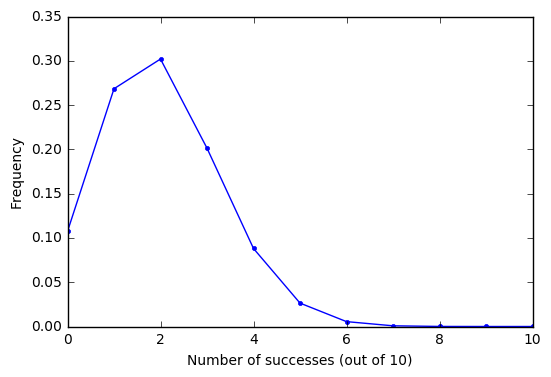

In [72]:
#just plotting a binomial distribution, no worries
x = np.linspace(0,10,11)
pmf = scipy.stats.binom.pmf(x,10,0.2)
plt.plot(x,pmf,".-")
plt.xlabel("Number of successes (out of 10)")
plt.ylabel("Frequency")

## 6.5 $\chi^2$ (chi-square) test 
### 6.2.1 Independence between variables using contingency tables:
`In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables. They are heavily used in survey research, business intelligence, engineering and scientific research. They provide a basic picture of the interrelation between two variables and can help find interactions between them.` (wikipedia)
- Visualize interaction between **categorical data**
- We can use the $\chi^2$ (chi-square) test to see if the interactions are significant.

**Example 1:** We will use this class as a sample

    `Is the probability of having dark eyes independent of the gender?`

- Why should it not?
- Why could it?

In [39]:
df_eyes = pd.DataFrame(
    [
        [5,5],
        [10,10]
    ],columns=["Dark","Clear"],index=["Male","Female"])

df_eyes

,Dark,Clear
Male,5,5
Female,10,10


In [40]:
scipy.stats.chi2_contingency(df_eyes)

(0.0, 1.0, 1, array([[  5.,   5.],
        [ 10.,  10.]]))

In [50]:
chi2_contingency?

In [6]:
chi,p,dof,expected = chi2_contingency(df_eyes)
print(p)
expected

1.0


array([[  5.,   5.],
       [ 10.,  10.]])

### How does it actually work?
- The program calculates for each cell $\chi^2 = (Observed^2-Expected^2)/(Expected^2)$.
- The degrees of freedom (a parameter) is $(\#rows-1)\cdot(\#columns-1)$.
- The probability of getting a value higher than chi_stat is given by a $\chi^2$ distribution. Which means we can calculate the probability of getting a more extreme result than x out of n trials.

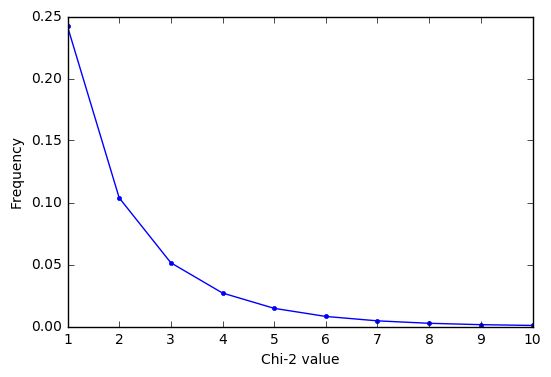

In [73]:
#just plotting a chi-square distribution, no worries
x = np.linspace(0,10,11)
pmf = scipy.stats.chi2.pdf(x,df=1)
plt.plot(x,pmf,".-")
plt.xlabel("Chi-2 value")
plt.ylabel("Frequency")